<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/04%20Clasificaci%C3%B3n%20y%20Agrupamiento/notebooks/11-Homolog%C3%ADa_Persistente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homología Persistente

In [ ]:
!pip install -q cython
!pip install -q ripser

     |████████████████████████████████| 72 kB 186 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 47 kB 4.7 MB/s 


## Homología Persistente como herramienta para la exploración de clusters

In [ ]:
import numpy as np

In [ ]:
from sklearn.datasets import make_blobs

n_clusters = 5

X,_ = make_blobs(n_samples=600,n_features=100,centers=n_clusters)

X.shape

(600, 100)

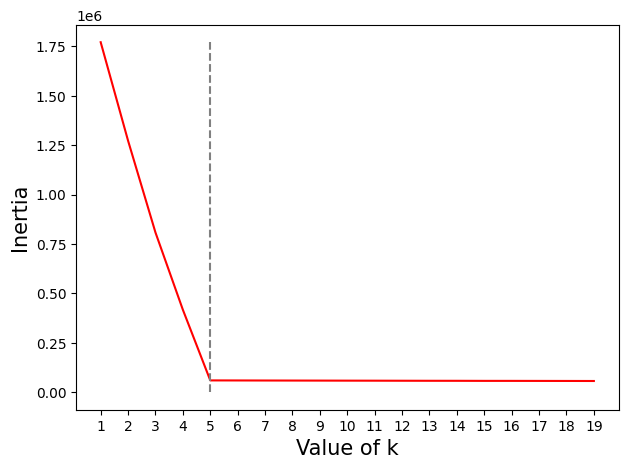

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

max_num_clusters = 20

inertias = []
k_values = list(range(1,max_num_clusters)) 
for k in k_values:
    modelo = KMeans(n_clusters=k)
    modelo.fit(X)
    inertias.append(modelo.inertia_)

plt.figure(figsize=(7,5))
plt.plot(k_values,inertias,color='red')
plt.plot([n_clusters,n_clusters],[0,max(inertias)],linestyle='dashed',color='gray')
plt.ylabel("Inertia", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.xticks(k_values)
plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


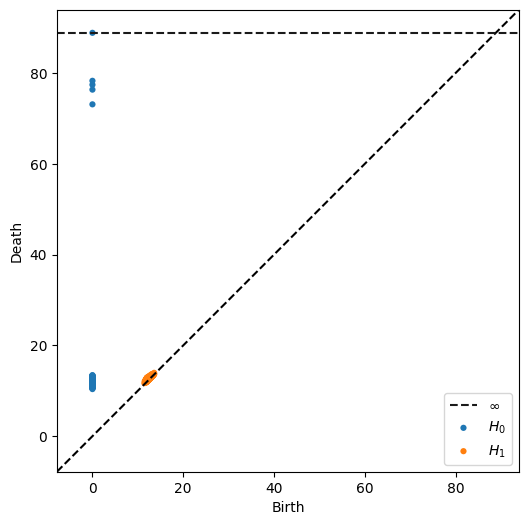

In [ ]:
from ripser import Rips

rips = Rips()
diagrams = rips.fit_transform(X)

plt.figure(figsize=(6,6))
rips.plot(diagrams)
plt.show()

## Un ejemplo real

Este conjunto de datos se ha adaptado a partir del conjunto de datos sobre vinos de https://archive.ics.uci.edu/ml/datasets/wine, eliminando la información sobre los tipos de vino para el aprendizaje no supervisado.

Estos datos son los resultados de un análisis químico de vinos cultivados en la misma región de Italia pero derivados de tres cultivares diferentes. El análisis determinó las cantidades de 13 componentes encontrados en cada uno de los tres tipos de vino.

Este dataset puede ser encontrado en (https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering).

In [75]:
!apt-get -qq install > /dev/null subversion

!svn checkout "https://github.com/DCDPUAEM/DCDP_2022/trunk/04%20Clasificaci%C3%B3n%20y%20Agrupamiento/data/"

A    data/Spotify-2000.csv
A    data/bank.csv
A    data/creditcard.zip
A    data/diabetes.csv
A    data/dt_classifier.model
A    data/frequencia_palabras.csv
A    data/spanishText_180000_185000
A    data/wine-clustering.csv
Checked out revision 102.


In [76]:
import pandas as pd

wine_df = pd.read_csv('/content/data/wine-clustering.csv')

wine_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
wine_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


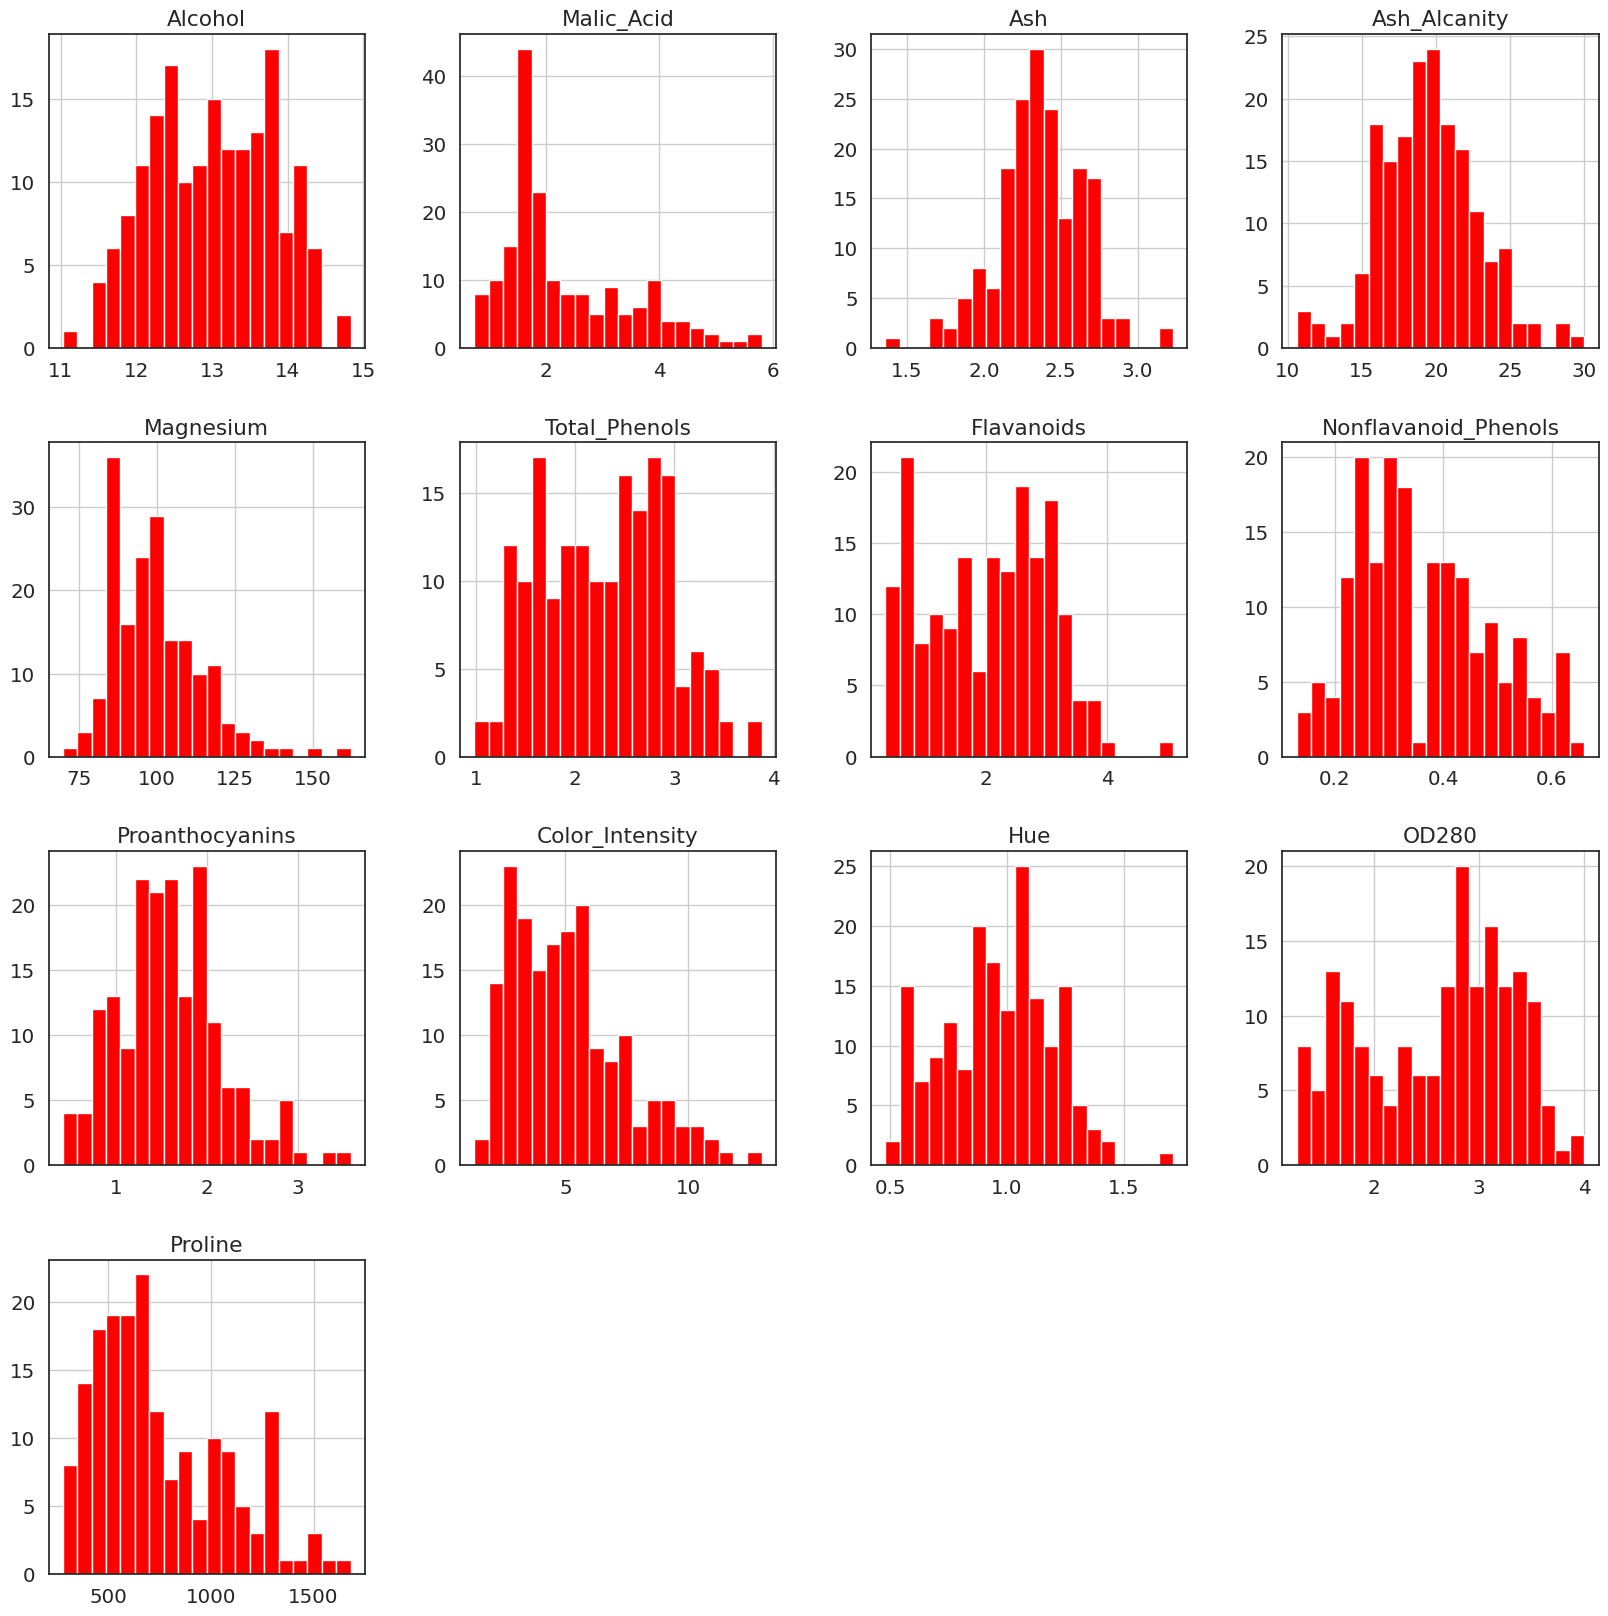

In [ ]:
import seaborn as sns

sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax = wine_df.hist(bins=20,color='red' )
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_cluster = wine_df.copy()
data_cluster[data_cluster.columns] = std_scaler.fit_transform(data_cluster)

data_cluster

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


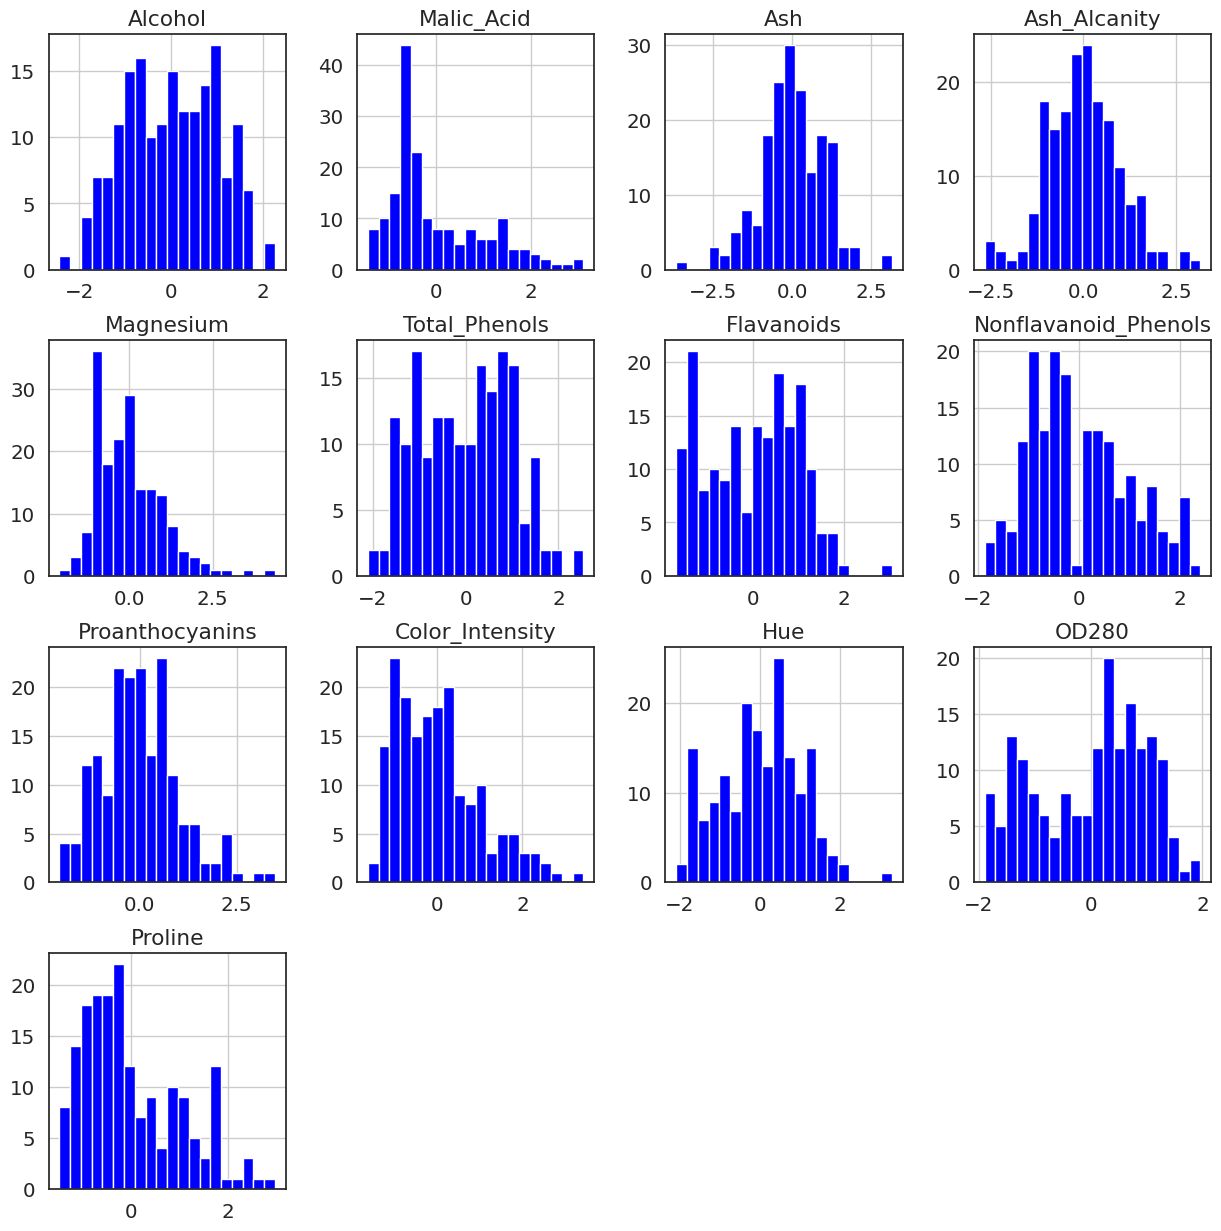

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(15,15)})
ax = data_cluster.hist(bins=20,color='blue' )
plt.show()

In [ ]:
data_cluster.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


### ¿Cuántos clusters hay?

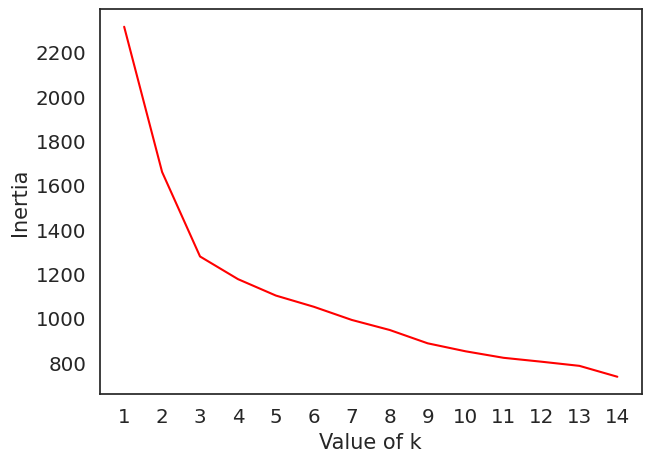

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

max_num_clusters = 15

inertias = []
k_values = list(range(1,max_num_clusters)) 
for k in k_values:
    modelo = KMeans(n_clusters=k)
    modelo.fit(data_cluster.values)
    inertias.append(modelo.inertia_)

plt.figure(figsize=(7,5))
plt.plot(k_values,inertias,color='red')
plt.ylabel("Inertia", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.xticks(k_values)
plt.show()

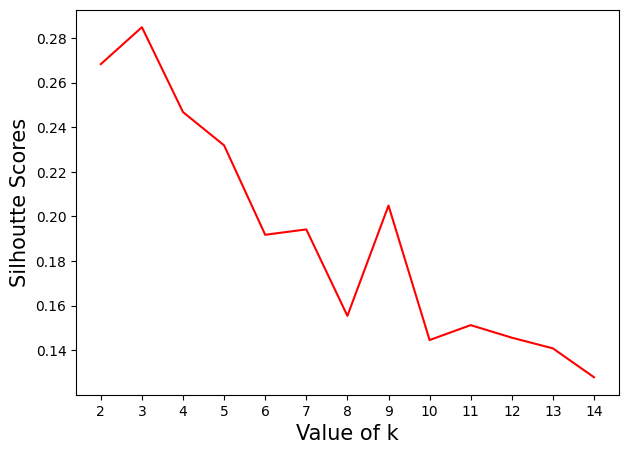

In [ ]:
from sklearn.metrics import silhouette_score

max_num_clusters = 15

siluetas = []
k_values = list(range(2,max_num_clusters)) 
for k in k_values:
    kmeans = KMeans(n_clusters=k).fit(data_cluster.values)
    labels = kmeans.labels_
    siluetas.append(silhouette_score(data_cluster.values, labels, metric='euclidean'))

plt.figure(figsize=(7,5))
plt.plot(k_values,siluetas,color='red')
plt.xticks(k_values)
plt.ylabel("Silhoutte Scores", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

Dado que estamos usando **esferas** alrededor de cada punto, la homología persistente, como herramienta de detección de clusters, funciona mejor cuando las variables tienen la misma escala (siempre que sean variables *independientes*). 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_cluster_minmax = wine_df.copy()
data_cluster_minmax[data_cluster_minmax.columns] = scaler.fit_transform(data_cluster)

In [ ]:
data_cluster_minmax.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Al aplicar homología persistente y observar los diagramas, podemos ver que se apoya la hipótesis de que tenemos 3 clusters.

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


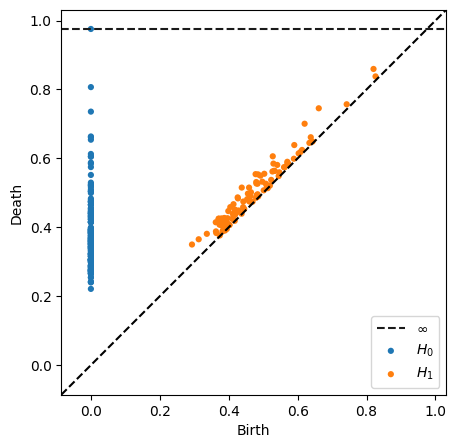

In [ ]:
from ripser import Rips

rips = Rips()
diagrams = rips.fit_transform(data_cluster_minmax.values)

plt.figure(figsize=(5,5))
rips.plot(diagrams)
plt.show()

### Realizamos la segmentación y visualización

Con los 3 clusters realizamos la segmentación y después, realizamos la visualización usando PCA.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=17,init='k-means++')

kmeans.fit(data_cluster.values)
labels = kmeans.labels_

centroids = kmeans.cluster_centers_

Cumulative variance explained by 2 principal components: 0.554


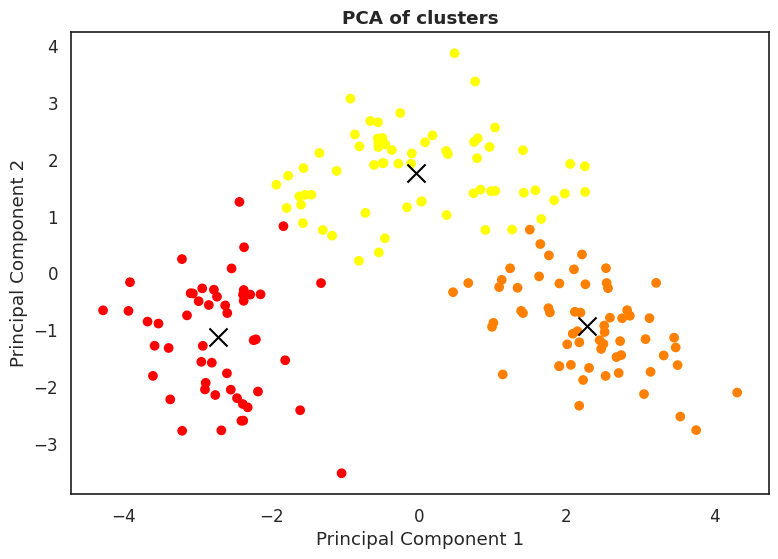

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data_cluster.values)

x_pca = pca.transform(data_cluster.values)

centroids_pca = pca.transform(centroids)

print (f"Cumulative variance explained by 2 principal components: {round(np.sum(pca.explained_variance_ratio_),3)}")

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=x_pca[:, 0], y=x_pca[:, 1], c=labels, cmap='autumn')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of clusters',fontweight='bold')
plt.show()

## MNIST

En este ejercicio veremos si la Homología Persistente nos da información acerca de cómo se ven las clases en el espacio de features.

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.reshape(x_train, (len(x_train), -1)) / 255.
x_test = np.reshape(x_test, (len(x_test), -1)) / 255.

11501568/11490434 [==============================] - 0s 0us/step


Función para obtener una muestra con las clases balanceadas

In [ ]:
from math import floor

def sampling(X,Y,ratio=0.25):
    class_size = floor((ratio*X.shape[0])/10)
    x = np.zeros(shape=(10*class_size,X.shape[1]))
    y = np.zeros(shape=(10*class_size,))
    for j in np.unique(Y):
        idxs = np.where(Y==j)[0]
        idxs = np.random.choice(idxs,size=class_size,replace=False)
        x[int(j*class_size):int((j+1)*class_size),:] = X[idxs,:]
        y[int(j*class_size):int((j+1)*class_size)] = Y[idxs]
    return x,y

In [ ]:
X,Y = sampling(x_train,y_train,ratio=0.05)

In [ ]:
print(f"Forma original del dataset: {x_train.shape}")
print(f"Forma del dataset reducido: {X.shape}")

Forma original del dataset: (60000, 784)
Forma del dataset reducido: (3000, 784)


Verifiquemos que tenemos las clases balanceadas en el sampleo.

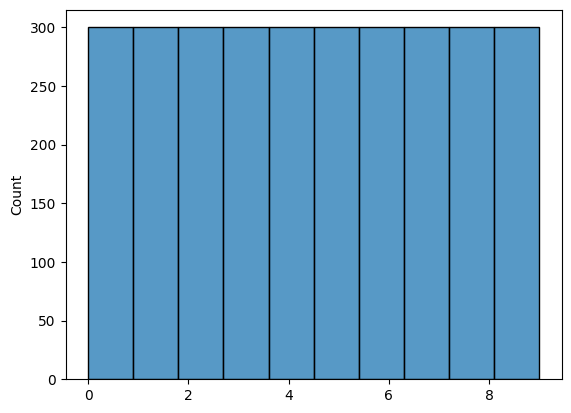

In [ ]:
from seaborn import histplot

histplot(Y,bins=10)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
x_red = pca.transform(X)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


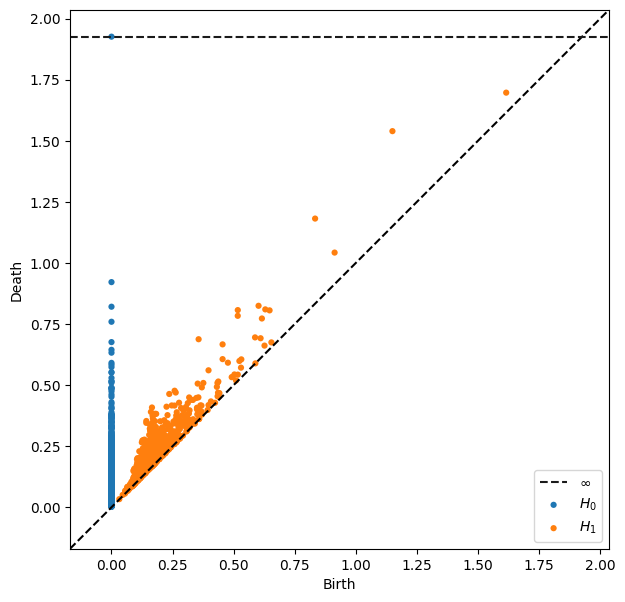

In [ ]:
from ripser import Rips

rips = Rips()
diagrams = rips.fit_transform(x_red)

plt.figure(figsize=(7,7))
rips.plot(diagrams)
plt.show()

⭕ Preguntas

* ¿Qué interpretación podemos darle a este diagrama, en relación con las clases? 
* ¿Las clases están separadas espacialmente?
* ¿Qué efecto puede tener la reducción de dimensionalidad?
* ¿Cómo se compara con la información obtenida con el coeficiente de silueta?

⭕ Ejercicio

* Repite el diagrama, ahora usando t-SNE.
* Obten el coeficiente de silueta en el caso de PCA y t-SNE.